In [1]:
%cd /home/ahaase/pc/Daten/DWBA
from aastylebib import *
import matplotlib.gridspec as gridspec
import fitting
import reflectivity
data_color = "#A60628"
fit_color = "#348ABD"
third_color = "#467821"

/home/ahaase/pc/Daten/DWBA


/home/ahaase/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
def eval_xrr(p, wls):
    c_cap, c_cd, sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c, N= p
    import numpy as np
    shift = 0.0
    sigma = s
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    #sigma = s_si
    euv_h = reflectivity.xrr(15.0,
                     wls,
                     stack,
                     henkes,
                     N,
                     None,sigma,
                     "Si", densities,None,0,capthicknesses, caphenkes, capdensities)
    tmp = []
              
        
    euv = euv_h

    return euv
    
    

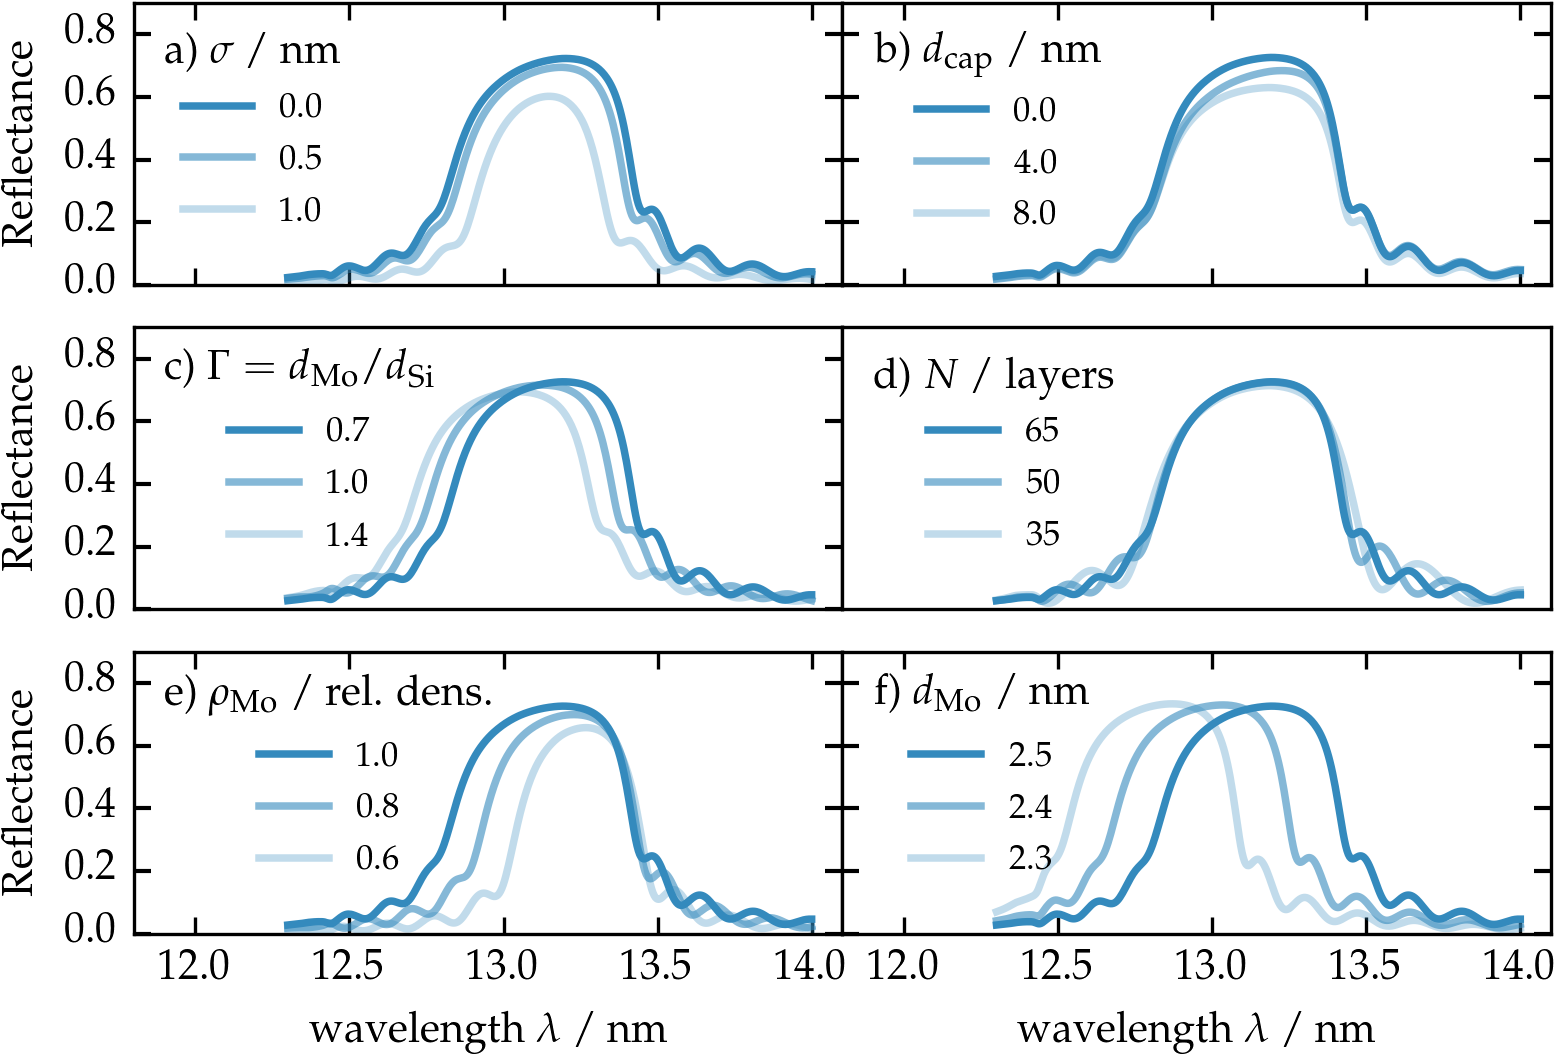

In [12]:
fig = plt.figure(figsize=fig_golden_ratio(15))
gs =  gridspec.GridSpec(3,2)
gs.update(left=0.15, right=0.95, hspace=0.15, wspace=0.0, top=0.95, bottom=0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])
ax5 = fig.add_subplot(gs[1,0])
ax6 = fig.add_subplot(gs[1,1])

ax1.set_xlim((11.8,14.1))
ax2.set_xlim((11.8,14.1))
ax3.set_xlim((11.8,14.1))
ax4.set_xlim((11.8,14.1))
ax5.set_xlim((11.8,14.1))
ax6.set_xlim((11.8,14.1))

ax1.set_ylim((0.0,0.9))
ax2.set_ylim((0.0,0.9))
ax3.set_ylim((0.0,0.9))
ax4.set_ylim((0.0,0.9))
ax5.set_ylim((0.0,0.9))
ax6.set_ylim((0.0,0.9))
ax1.set_ylabel("Reflectance")
ax3.set_ylabel("Reflectance")
ax5.set_ylabel("Reflectance")
ax3.set_xlabel("wavelength $\\lambda$ / nm")
ax4.set_xlabel("wavelength $\\lambda$ / nm")

ax2.set_yticklabels(())
ax4.set_yticklabels(())

ax1.set_xticklabels(())
ax2.set_xticklabels(())

ax1.set_yticks((0.0,0.2,0.4,0.6,0.8))
ax2.set_yticks((0.0,0.2,0.4,0.6,0.8))
ax3.set_yticks((0.0,0.2,0.4,0.6,0.8))
ax4.set_yticks((0.0,0.2,0.4,0.6,0.8))
ax5.set_yticks((0.0,0.2,0.4,0.6,0.8))
ax6.set_yticks((0.0,0.2,0.4,0.6,0.8))



wl = np.linspace(12.3, 14.0, 400)
p = [0.0, #c_cap, 0
    1.0, #c_cd,   1
    2.0, #sio2,   2
    3.5, #si,     3
    2.5, #mo,     4
    0.5, #c,      5
    0.0, #s,      6
    1.0, #d_si,   7
    1.0, #d_mo,   8
    1.0, #d_C,    9
    0.5, #b4c,   10
    1.0, #d_b4c  11
     65] #N      12

p[6] = 0.0
ax1.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.0$")
p[6] = 0.5
ax1.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.5$", alpha=0.6)
p[6] = 1.0
ax1.plot(wl,eval_xrr(p, wl), color=fit_color, label="$1.0$", alpha=0.3)
ax1.legend(title="a) $\\sigma$ / nm",loc=2)
p[6] = 0.0


p[2] = 0.0
ax2.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.0$")
p[2] = 4.0
ax2.plot(wl,eval_xrr(p, wl), color=fit_color, label="$4.0$", alpha=0.6)
p[2] = 8.0
ax2.plot(wl,eval_xrr(p, wl), color=fit_color, label="$8.0$", alpha=0.3)
ax2.legend(title="b) $d_\mathrm{cap}$ / nm",loc=2)
p[2] = 0.0

p[8] = 1.0
ax3.plot(wl,eval_xrr(p, wl), color=fit_color, label="$1.0$")
p[8] = 0.8
ax3.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.8$", alpha=0.6)
p[8] = 0.6
ax3.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.6$", alpha=0.3)
ax3.legend(title="e) $\\rho_\mathrm{Mo}$ / rel. dens.",loc=2)
p[8] = 1.0

p[4] = 2.5
ax4.plot(wl,eval_xrr(p, wl), color=fit_color, label="$2.5$")
p[4] = 2.4
ax4.plot(wl,eval_xrr(p, wl), color=fit_color, label="$2.4$", alpha=0.6)
p[4] = 2.3
ax4.plot(wl,eval_xrr(p, wl), color=fit_color, label="$2.3$", alpha=0.3)
ax4.legend(title="f) $d_\mathrm{Mo}$ / nm",loc=2)
p[4] = 2.5

p[3] = 3.5
p[4] = 2.5
ax5.plot(wl,eval_xrr(p, wl), color=fit_color, label="$0.7$")
p[3] = 3.0
p[4] = 3.0
ax5.plot(wl,eval_xrr(p, wl), color=fit_color, label="$1.0$", alpha=0.6)
p[3] = 2.5
p[4] = 3.5
ax5.plot(wl,eval_xrr(p, wl), color=fit_color, label=str(3.5/2.5), alpha=0.3)
ax5.legend(title="c) $\\Gamma = d_\mathrm{Mo}/d_\mathrm{Si}$",loc=2)
p[3] = 3.5
p[4] = 2.5
ax5.set_xticks(())

p[12] = 65
ax6.plot(wl,eval_xrr(p, wl), color=fit_color, label="$65$")
p[12] = 50
ax6.plot(wl,eval_xrr(p, wl), color=fit_color, label="$50$", alpha=0.6)
p[12] = 35
ax6.plot(wl,eval_xrr(p, wl), color=fit_color, label="$35$", alpha=0.3)
ax6.legend(title="d) $N$ / layers",loc=2)
p[12] = 65
ax6.set_xticks(())
ax6.set_yticks(())

fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/parameter_influence.pdf")
fig

/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


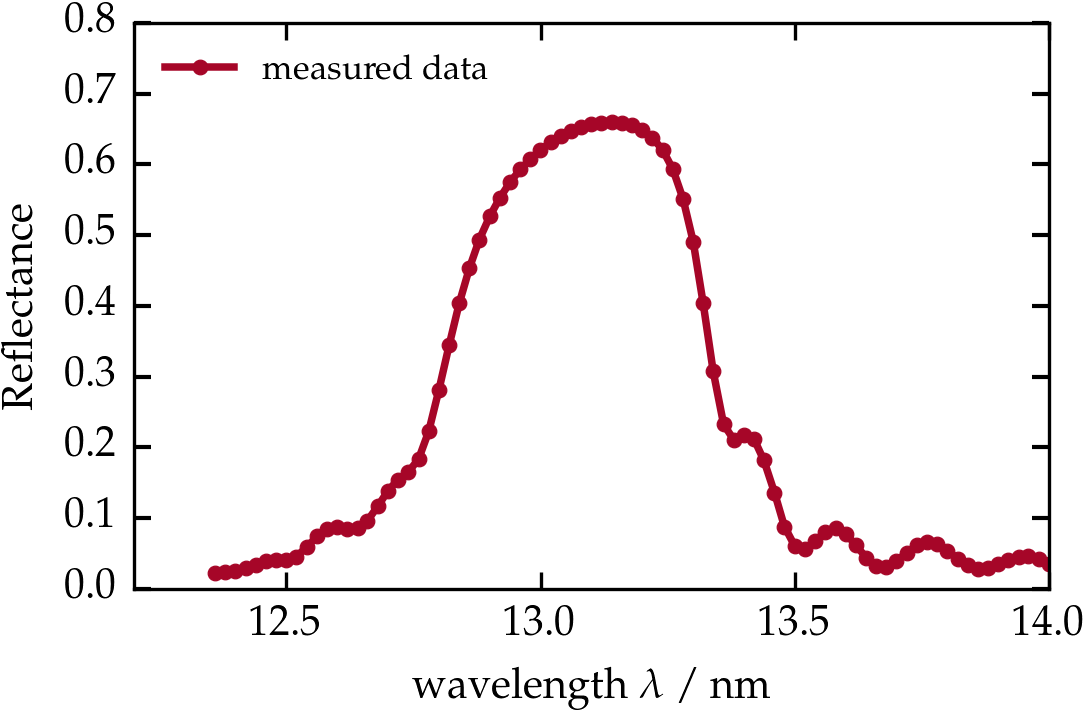

In [63]:
fig = plt.figure(figsize=fig_golden_ratio(2*15/3))
ax = fig.add_subplot(111)

%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
wl = np.load("PTB17_wl.npy")
dat = np.load("PTB17_dat.npy")

ax.plot(wl, dat, ".-", color=data_color, label="measured data")
#ax.fill_between(wl, dat-(np.nanmax(dat)*0.025)/2.0, dat+(np.nanmax(dat)*0.025)/2.0,
#                alpha=0.4, color=data_color, label="uncertainty", linewidth=0)
ax.legend(loc=2)
ax.set_ylabel("Reflectance")
ax.set_xlabel("wavelength $\\lambda$ / nm")        
ax.set_ylim((0.0,0.8))
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_reflectance_AOI_15.pdf")
fig